## Importing Libraries and simple configurations

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(8.7,8.27)})
from sklearn.ensemble import RandomForestClassifier

### Import Datasets

In [152]:
train = pd.read_csv('train.csv')
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [153]:
test = pd.read_csv('test.csv')
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


## Dataset Understanding

In [154]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [155]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,110023.0,2.200450e+05,31761.048671,165034.00,1.925395e+05,220045.00,2.475505e+05,275056.00
CustomerId,110023.0,1.569210e+07,71684.990992,15565701.00,1.563286e+07,15690175.00,1.575693e+07,15815690.00
CreditScore,110023.0,6.565308e+02,80.315415,350.00,5.970000e+02,660.00,7.100000e+02,850.00
Age,110023.0,3.812221e+01,8.861550,18.00,3.200000e+01,37.00,4.200000e+01,92.00
Tenure,110023.0,4.996637e+00,2.806148,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,110023.0,5.533361e+04,62788.519675,0.00,0.000000e+00,0.00,1.201456e+05,250898.09
NumOfProducts,110023.0,1.553321e+00,0.544714,1.00,1.000000e+00,2.00,2.000000e+00,4.00
HasCrCard,110023.0,7.530425e-01,0.431244,0.00,1.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,110023.0,4.952328e-01,0.499980,0.00,0.000000e+00,0.00,1.000000e+00,1.00
EstimatedSalary,110023.0,1.123151e+05,50277.048244,11.58,7.444033e+04,117832.23,1.546314e+05,199992.48


## Data Cleaning and Preparation

In [156]:
from sklearn.preprocessing import MinMaxScaler 

In [157]:
test.fillna(0)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


### Looking at the targets, we can see that we have an Imbalanced Data

In [158]:
(train.Exited.value_counts() / len(train)) * 100

Exited
0    78.840118
1    21.159882
Name: count, dtype: float64

### Verifying and leading with Missing values 


In [159]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [161]:
import warnings
warnings.filterwarnings('ignore')

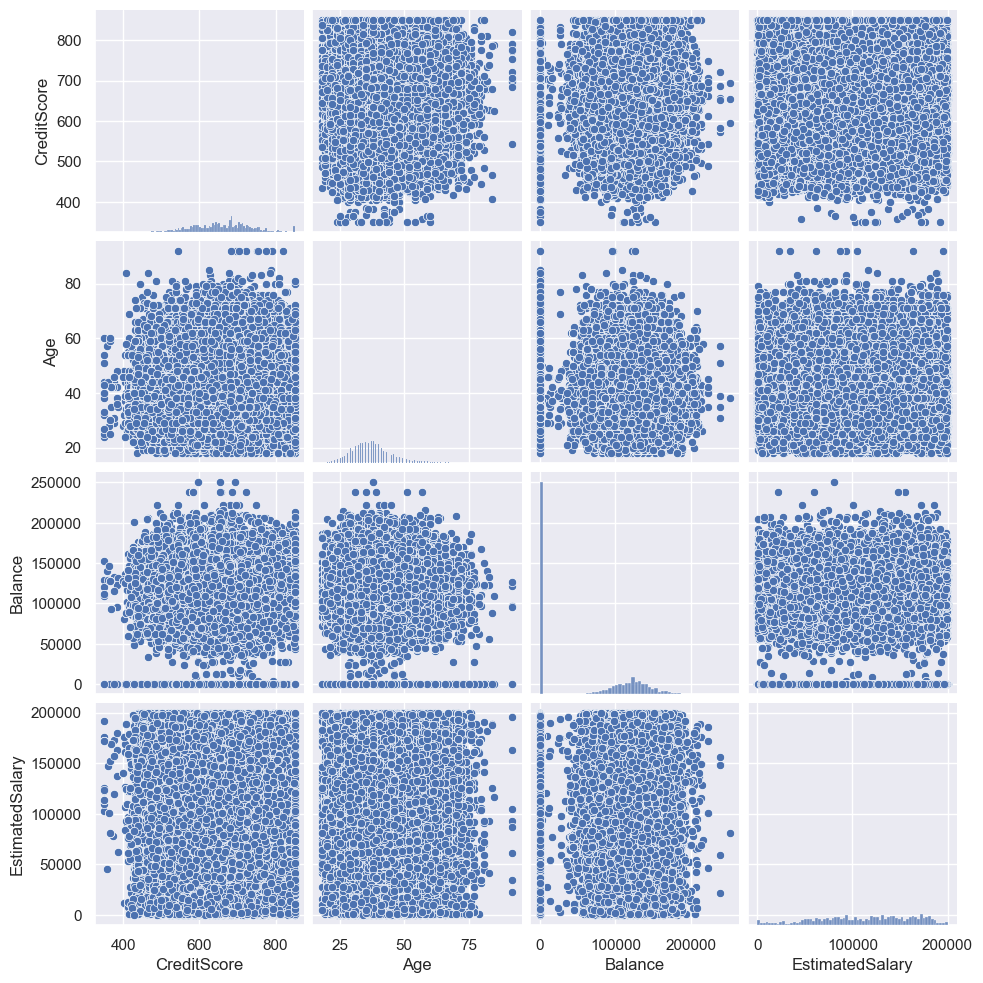

In [162]:
# Pairplot
sns.pairplot(train[num_cols])
plt.show()

#### Feature Engineering

In [163]:
train.sample(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
147986,147986,15662291,Dyson,745,France,Male,52.0,8,0.00,2,1.0,1.0,115719.08,0
39633,39633,15642099,Ho,648,Spain,Male,31.0,3,98795.61,2,1.0,0.0,89123.99,0
117192,117192,15686958,Kao,641,France,Female,32.0,7,0.00,1,1.0,1.0,184843.24,0
62632,62632,15664668,Milani,748,Germany,Female,49.0,6,93617.71,1,1.0,0.0,1375.24,1
88569,88569,15593636,Lloyd,683,France,Male,45.0,7,144880.34,2,0.0,0.0,175643.44,1
2068,2068,15569410,Hsieh,579,France,Female,34.0,8,0.00,1,0.0,0.0,181204.74,1
27126,27126,15661380,Chijindum,487,Spain,Male,30.0,6,0.00,2,1.0,0.0,146051.55,0
55704,55704,15707107,McKay,685,Germany,Male,45.0,8,121911.59,1,1.0,0.0,193312.33,0
87618,87618,15718289,T'an,705,Spain,Male,61.0,4,0.00,1,1.0,0.0,131281.27,1
13841,13841,15750728,Kaur,686,Spain,Female,42.0,2,0.00,1,1.0,0.0,102889.34,1


In [164]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [165]:
train.drop(columns = ['id', 'CustomerId', 'Surname', 'Geography'], inplace = True)

In [166]:
train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Leading with categorical data

In [167]:
pd.get_dummies(train.Gender)

,Female,Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
165029,True,False
165030,False,True
165031,False,True
165032,True,False


In [168]:
train['IsMale?'] = pd.get_dummies(train.Gender, drop_first = True, dtype = 'int')
train.drop('Gender', axis = 1, inplace = True)
train.describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
HasCrCard,165034.0,0.753954,0.430707,0.00,1.00,1.0,1.0000,1.00
IsActiveMember,165034.0,0.497770,0.499997,0.00,0.00,0.0,1.0000,1.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48
Exited,165034.0,0.211599,0.408443,0.00,0.00,0.0,0.0000,1.00
IsMale?,165034.0,0.564429,0.495833,0.00,0.00,1.0,1.0000,1.00


In [169]:
train.fillna(0)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale?
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0


In [170]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [171]:
y = train.pop('Exited')
X = train

In [172]:
X=pd.get_dummies(X,prefix_sep='__')
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsMale?
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,1


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

#### Random Forest 

In [174]:
RandomForest = RandomForestClassifier(class_weight='balanced') 
RandomForest.fit(X_train, y_train)
y_predictions = RandomForest.predict(X_test)

In [175]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26023
           1       0.72      0.49      0.58      6984

    accuracy                           0.85     33007
   macro avg       0.80      0.72      0.75     33007
weighted avg       0.84      0.85      0.84     33007



### Explaining via Visualization

In [139]:
RandomForest.estimators_[0].tree_.max_depth



38

In [176]:
from sklearn import tree

### The Tree below show the key factors to predict the Churn

In [146]:
tree.plot_tree(RandomForest.estimators_[0], feature_names=X.columns, filled=True)

[Text(0.6009735618401834, 0.9871794871794872, 'Age <= 41.5\ngini = 0.5\nsamples = 83423\nvalue = [66149.218, 65507.83]'),
 Text(0.3860239262550216, 0.9615384615384616, 'NumOfProducts <= 1.5\ngini = 0.437\nsamples = 60142\nvalue = [53549.639, 25517.407]'),
 Text(0.22235761888427388, 0.9358974358974359, 'IsMale? <= 0.5\ngini = 0.5\nsamples = 25512\nvalue = [20445.857, 19281.604]'),
 Text(0.11619366654648934, 0.9102564102564102, 'IsActiveMember <= 0.5\ngini = 0.489\nsamples = 10787\nvalue = [7874.816, 10682.859]'),
 Text(0.07870485968499115, 0.8846153846153846, 'Tenure <= 5.5\ngini = 0.441\nsamples = 5708\nvalue = [3661.216, 7492.888]'),
 Text(0.05521753727831635, 0.8589743589743589, 'EstimatedSalary <= 182040.531\ngini = 0.426\nsamples = 3161\nvalue = [1964.74, 4428.153]'),
 Text(0.03600607118835764, 0.8333333333333334, 'Age <= 36.5\ngini = 0.421\nsamples = 2942\nvalue = [1801.118, 4177.681]'),
 Text(0.015010575156084064, 0.8076923076923077, 'Balance <= 60688.619\ngini = 0.471\nsamples =

Error in callback <function flush_figures at 0x00000138740425C0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



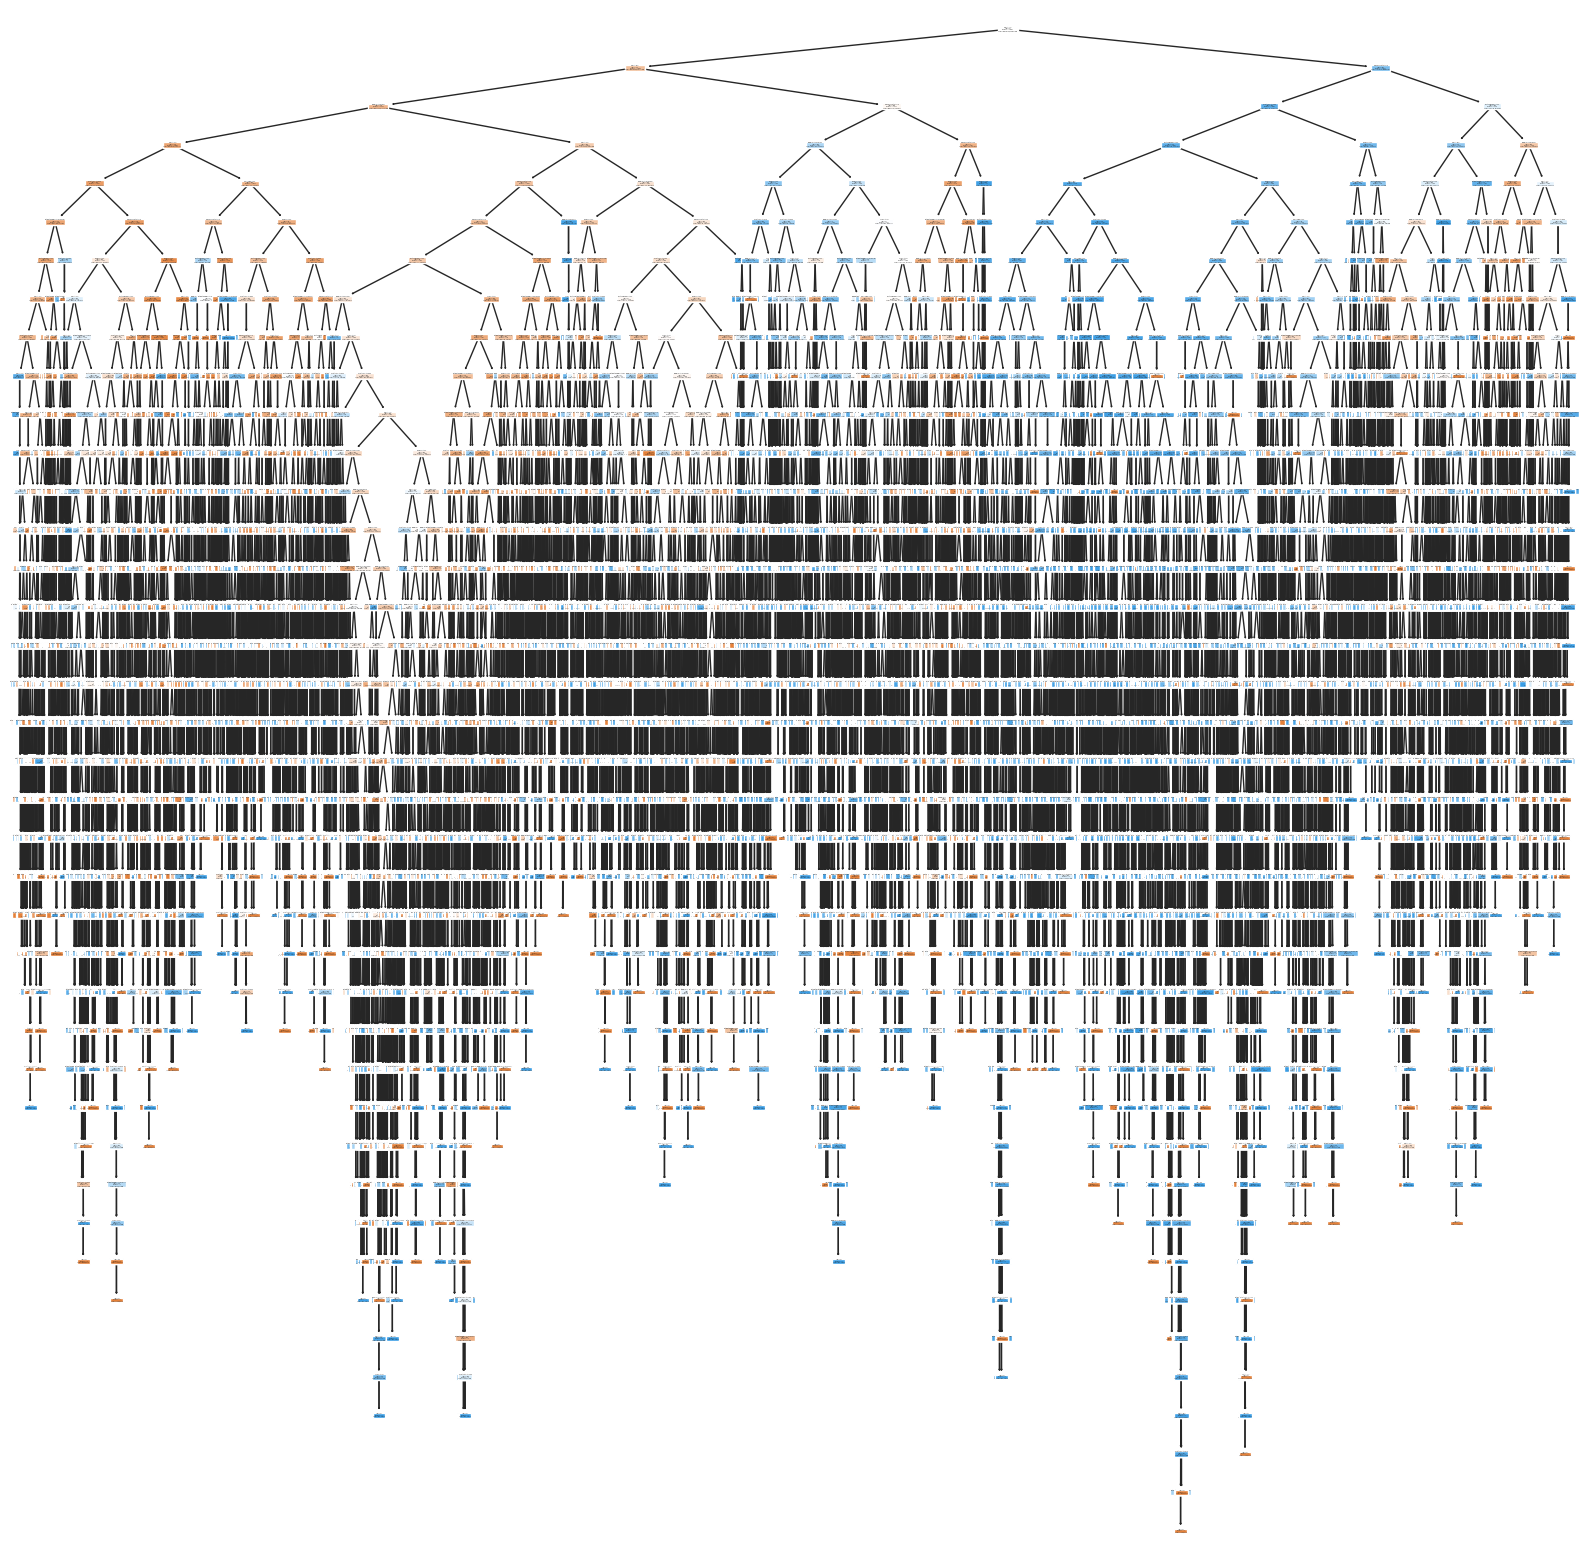

In [180]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(RandomForest.estimators_[0], feature_names=X.columns, filled=True)

#### Main Insight until now.

##### The main variables to predict the churn are Age, Number of Products, Gender and be an Active Member.

#### Trying generating a Tree with less steps (to support a better visualization)

In [181]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(criterion='mse', max_depth=3, max_features='auto')

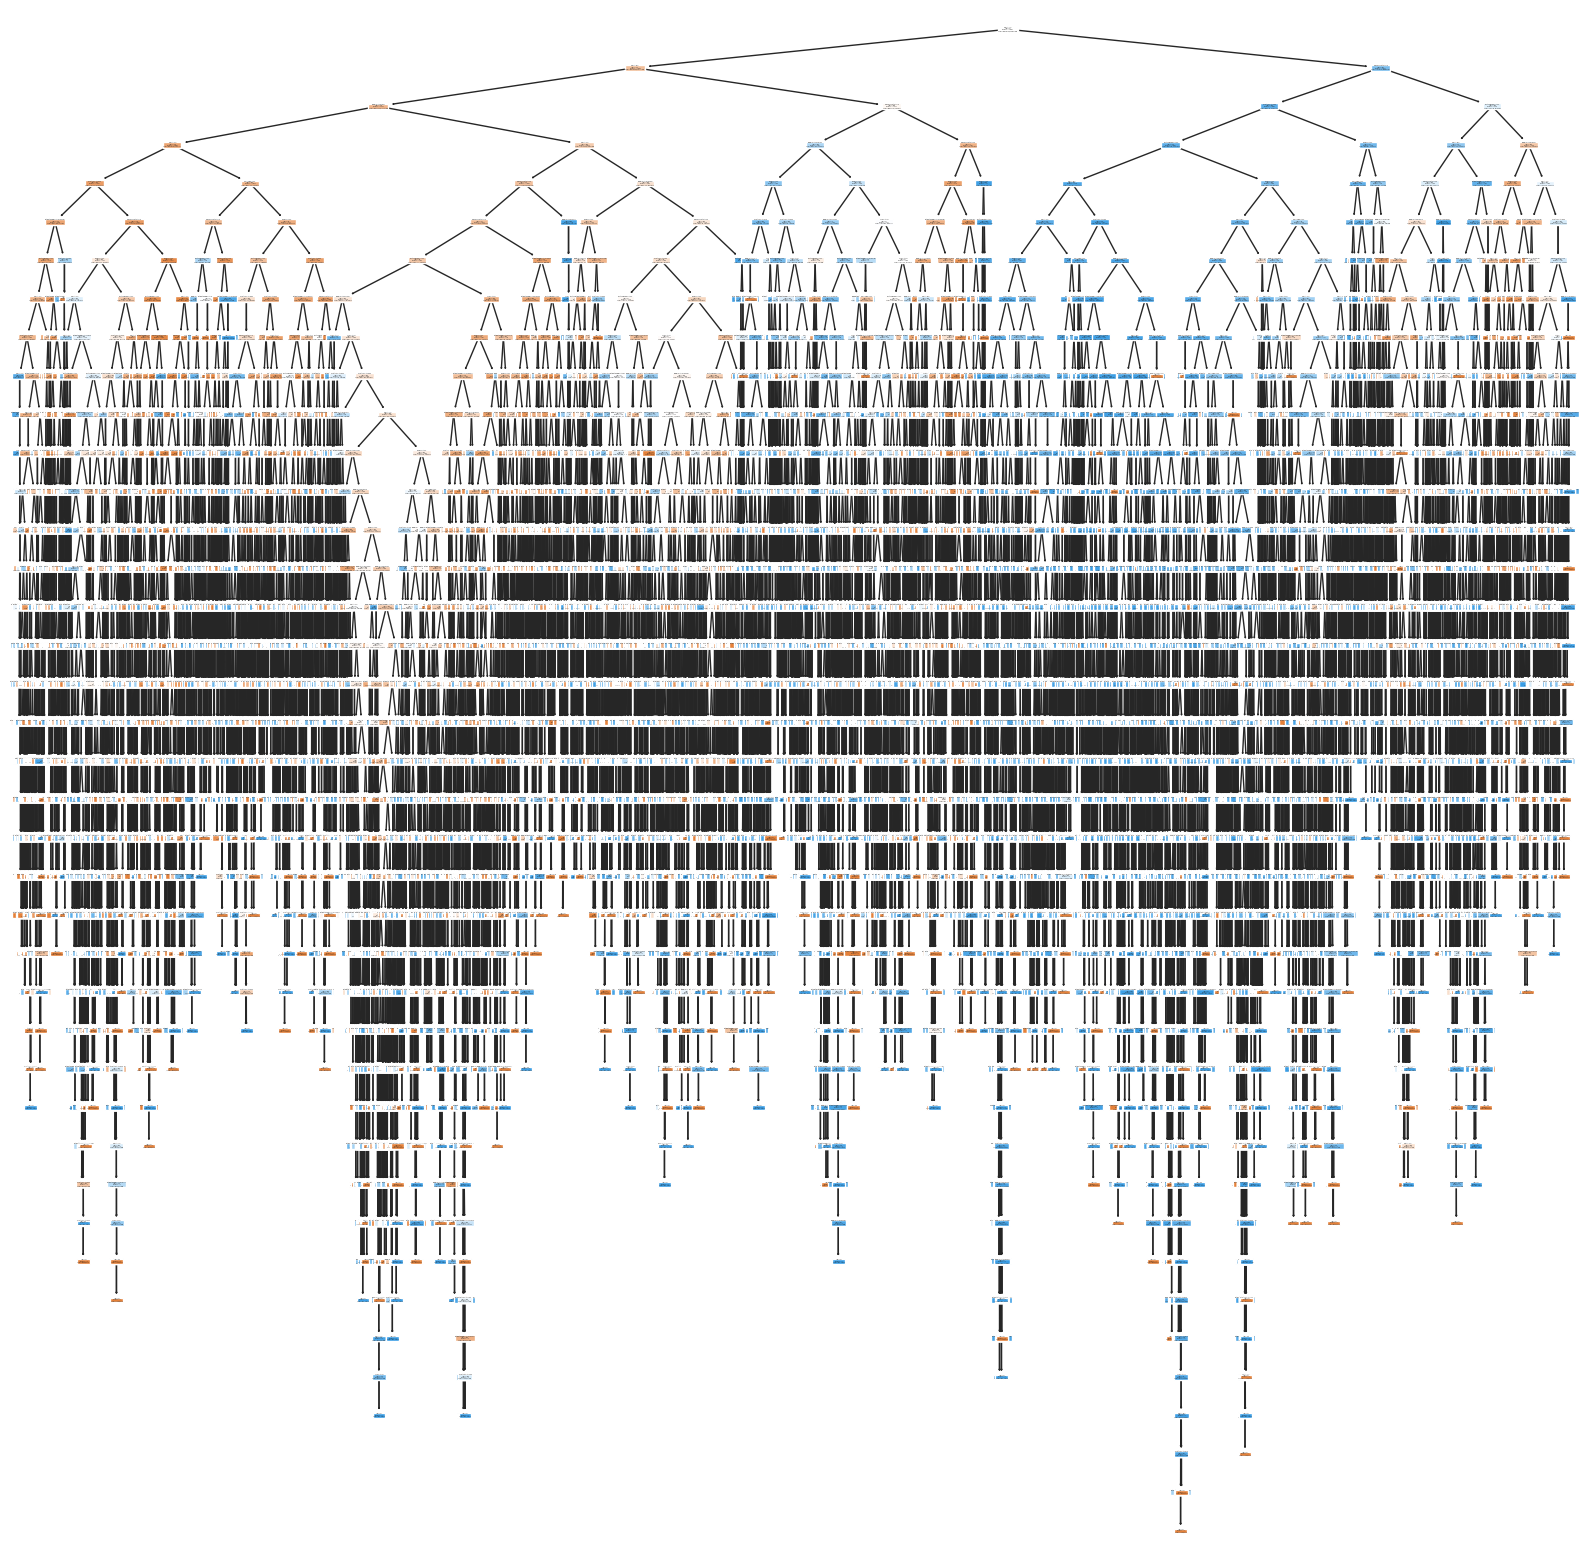

In [184]:
plt.figure(figsize=(20,20))
_ =tree.plot_tree(RandomForest.estimators_[0], feature_names=X.columns, filled=True)

### Takeouts

##### Key  features to predict the churn: Age, Number of Products, Gender, being an Active Member, Tenure, and Estimated Salary, as we can see in the initial rules below: 

'Age <= 41.5\ngini = 0.5\nsamples = 83423\nvalue = [66149.218, 65507.83]'),

'NumOfProducts <= 1.5\ngini = 0.437\nsamples = 60142\nvalue = [53549.639, 25517.407]'),

'IsMale? <= 0.5\ngini = 0.5\nsamples = 25512\nvalue = [20445.857, 19281.604]'),

'IsActiveMember <= 0.5\ngini = 0.489\nsamples = 10787\nvalue = [7874.816, 10682.859]'),

'Tenure <= 5.5\ngini = 0.441\nsamples = 5708\nvalue = [3661.216, 7492.888]'),

'EstimatedSalary <= 182040.531\ngini = 0.426\nsamples = 3161\nvalue = [1964.74, 4428.153]'),

###### Dataset problems: 
- class imbalanced and some noises (treated). 
- Future Directions: based on original data, generate other instances (synthetic data/data augmentation)